In [1]:
# Activity 1
#Logistic Regression-Classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('E:heart_cleveland_upload.csv')

# Prepare the features and target variables
X = data.drop('age', axis=1)
y = data['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the classifier output
print("Classifier Output:")
print(y_pred)

# Print the detailed accuracy by class
print("Detailed Accuracy by Class:")
print(classification_report(y_test, y_pred))

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classifier Output:
[1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1]
Detailed Accuracy by Class:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy: 100.00%
Confusion Matrix:
[[32  0]
 [ 0 28]]


C:\Users\USER\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\USER\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


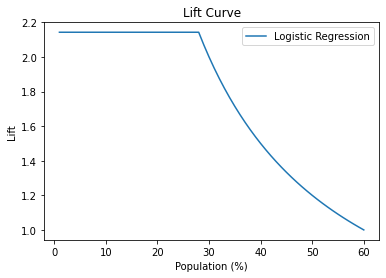

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('E:heart_cleveland_upload.csv')

# Separate features (X) and target variable (y)
X = data.drop('age', axis=1)
y = data['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Create a DataFrame with the actual labels and predicted probabilities
df = pd.DataFrame({'Actual': y_test, 'Probability': y_pred_proba})
df = df.sort_values(by='Probability', ascending=False).reset_index(drop=True)
df['CumulativePositives'] = df['Actual'].cumsum()
df['CumulativePopulation'] = df.index + 1

# Calculate the cumulative lift values
df['Lift'] = df['CumulativePositives'] / (df['CumulativePopulation'] * (df['Actual'].sum() / df.shape[0]))

# Plot the Lift curve
plt.plot(df['CumulativePopulation'], df['Lift'], label='Logistic Regression')
plt.xlabel('Population (%)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.show()


In [ ]:
we first import the necessary libraries and load the dataset.
Then, we separate the features (X) and the target variable (y).
Next, we split the data into training and testing sets 
using the train_test_split function from scikit-learn.
We then create a logistic regression model using the LogisticRegression class from scikit-learn 
and fit it to the training data using the fit method.
After fitting the model, we make predictions on the test set 
using the predict_proba method to obtain the predicted probabilities of the positive class.
We create a DataFrame df with the actual labels and predicted probabilities, 
sort it in descending order of probabilities, and calculate the cumulative positives 
and cumulative population.
Finally, we calculate the lift values as the ratio of cumulative positives 
to the cumulative population and plot the Lift curve using matplotlib.

C:\Users\USER\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


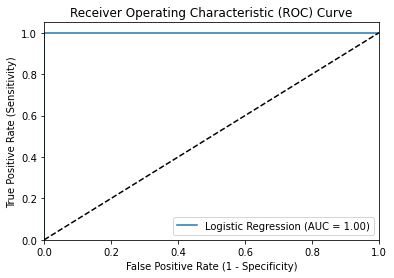

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('E:heart_cleveland_upload.csv')

# Separate features (X) and target variable (y)
X = data.drop('age', axis=1)
y = data['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the random model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
we first import the necessary libraries and load the dataset. 
Then, we separate the features (X) and the target variable (y).
Next, we split the data into training and testing sets
using the train_test_split function from scikit-learn.
We create a logistic regression model using the LogisticRegression class 
from scikit-learn and fit it to the training data using the fit method.
After fitting the model, we make predictions on the test set
using the predict_proba method to obtain the predicted probabilities of the positive class.
We then use the roc_curve function from scikit-learn to calculate 
the false positive rate (FPR), true positive rate (TPR), and corresponding thresholds.
We calculate the area under the ROC curve (AUC) using the auc function from scikit-learn.
Finally, we plot the ROC curve using matplotlib,
where the x-axis represents the false positive rate (1 - specificity),
the y-axis represents the true positive rate (sensitivity), and the AUC is displayed in the legend.